<a href="https://colab.research.google.com/github/BcPerezS/Diseno-de-Experimentos/blob/main/Taller_dise%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Taller diseño de experimentos
Universidad Nacional 2021-2
Julian Serna Bryan Perez



In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random
import scipy as sc
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import seaborn as sns
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist

 
%matplotlib inline




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

#(set.seed(1001280374)
#Seqlat <- seq(from = -73.30, to = -73.25, by = .001)
#Seqlong <- seq(from = 5.54, to = 5.58, by = .001)
#Latitude <- sample(Seqlat, size = 100, replace = TRUE)
#Longitude <- sample(Seqlong, size = 100, replace = TRUE)
#xy <- data.frame(x = Longitude, y = Latitude)
#plot(xy$x, xy%y)
#SMI = sort.int(runif(100,0.7,0.95), partial = 10)
#NDVI = sort.int(runif(100,0.45,0.06), partial = 10)
#LST = sort.int(26*rbeta(100,shape1 = 0.87, shape2 = 0.91), partial = 10)
#df1 = data.frame(xy, SMI, NDVI, LST))


In [4]:
#Pasando el código a python

from numpy.ma.core import size
np.random.seed(1001280374)
Seqlat = np.arange(-73.30,-73.25,.001)
Seqlong = np.arange(5.54, 5.58, .001)
Latitude = pd.DataFrame.sample(pd.DataFrame(Seqlat), 100, replace = True)
Latitude = list(Latitude[0])
Longitude = pd.DataFrame.sample(pd.DataFrame(Seqlong), 100, replace = True)
Longitude = list(Longitude[0])

SMI= np.partition(np.random.uniform(0.7, 0.95, 100), 10)
NDVI= np.partition(np.random.uniform(0.45, 0.06, 100), 10)
LST= np.partition(26* sc.stats.beta.rvs(0.87, 0.91, size = 100), 10)

df1 = pd.DataFrame({"Lat":Latitude, "Lon":Longitude, "SMI":SMI, "NDVI":NDVI, "LST":LST})
df1["Posición"] = np.arange(len(df1))

print(df1.head())






      Lat    Lon       SMI      NDVI       LST  Posición
0 -73.289  5.573  0.705713  0.064993  0.532699         0
1 -73.285  5.560  0.700274  0.065298  1.014483         1
2 -73.298  5.543  0.703694  0.070541  0.162634         2
3 -73.273  5.578  0.704783  0.071433  0.936897         3
4 -73.268  5.543  0.707585  0.072474  0.079172         4


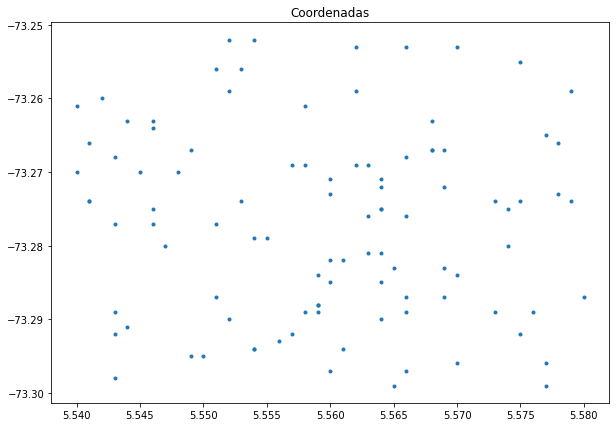

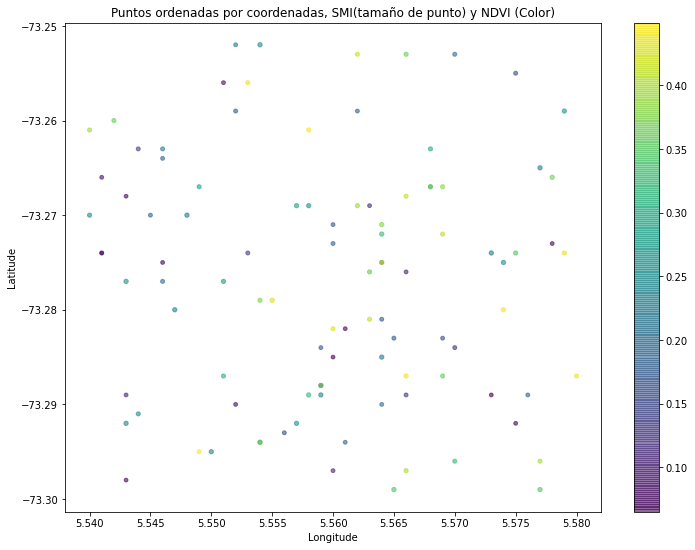

In [5]:
#Graficando nube de puntos (sólo coordenadas)
plt.figure(figsize=(10,7))
plt.plot(Longitude,Latitude,'o',markersize=3)
plt.title('Coordenadas')
plt.show()
#Graficando tamaño de puntos de acuerdo con el SMI y el color de acuerdo al NDVI
x = Longitude
y = Latitude
colors = NDVI
sizes = SMI*20
markers = LST
plt.figure(figsize=(12,9))
plt.scatter(x, y, c=colors, s=sizes, alpha= 0.6,
            cmap='viridis')
plt.title('Puntos ordenadas por coordenadas, SMI(tamaño de punto) y NDVI (Color)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(); 


#Las coordenadas tienen una distribuci{on que concentra los puntos en la parte media-baja del gráfico, las variables son similares
#Por lo que casi no hay un comportamiento marcado observable en los gráficos



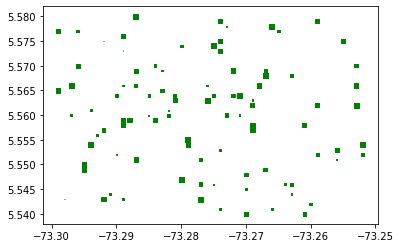

In [6]:
#Graficando simbolos a partir del LST

plt.scatter(df1["Lat"], df1["Lon"], marker=",", color= "GREEN", s=df1["LST"])
plt.show()


In [7]:
#Sobre el mapa de Colombia
BBox = (df1.Lon.min(), df1.Lon.max(),      
        df1.Lat.min(), df1.Lat.max() )

ruh_m = plt.imread(r"/content/map.png")
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df1.Lon, df1.Lat, zorder=1, alpha= 0.6, c='b', s=10)
ax.set_title('Plotting Spatial Data on Colombia Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')



#Borrando los puntos
Map = folium.Map(location = [5, -73],zoom_start = 6)
for i in range(len(df1['Lat'])):
    folium.Marker(
        location = [df1['Lon'][i],df1['Lat'][i]],
        popup = f'Lon: {df1["Lon"][i]}, Lat: {df1["Lat"][i]}',
        icon = folium.Icon()
    ).add_to(Map)
Map

FileNotFoundError: ignored

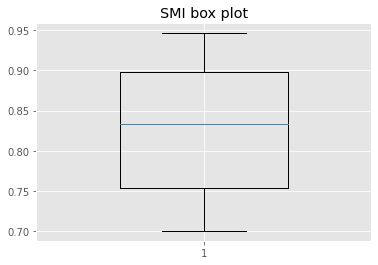

In [8]:
#Boxplot SMI
plt.style.use('ggplot')
plt.boxplot(SMI, widths=(0.5))
plt.title("SMI box plot")
plt.show()
#El boxplot muestra una distribución uniforme de los datos

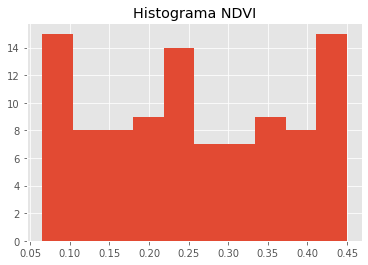

In [9]:
#Histograma NDVI
plt.style.use('ggplot')
plt.hist(NDVI)
plt.title("Histograma NDVI")
plt.show()
#Hay una mayor concentración de datos más o menos cada 0.20 

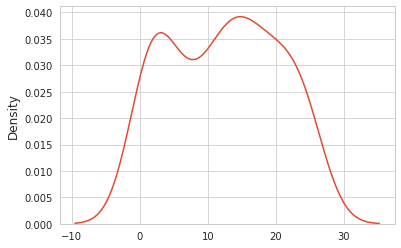

In [10]:

#Densidad para LST
sns.set_style('whitegrid')
sns.kdeplot(LST)




In [11]:
#Estadísticas descriptivas de SMI, NDVI y LST

average = ((df1['NDVI'].mean()), (df1['SMI'].mean()), (df1['LST'].mean()) )
print(average)

med = ((df1['NDVI'].median()), (df1['SMI'].median()), (df1['LST'].median()) )
print(med)

standard_deviation = ((df1['NDVI'].std()), (df1['SMI'].std()), (df1['LST'].std()) )
print(standard_deviation)



(0.2543002273069991, 0.8292033140348499, 12.331208880253005)
(0.2440855305598205, 0.8332182356163464, 12.40924354932866)
(0.12138293226025237, 0.07600561012081186, 8.00434628874252)


In [12]:
#Fraccionando los datos en 4 cuadrantes

I = df1.iloc[:25]
II = df1.iloc[25:50]
III = df1.iloc[50:75]
IV = df1.iloc[75:]

#Variables descriptivas de la latitud por cuadrante
average = ((I['Lat'].mean()), (II['Lat'].mean()), (III['Lat'].mean()), (IV['Lat'].mean()) )
print(average)

med = ((I['Lat'].median()), (II['Lat'].median()), (III['Lat'].median()), (IV['Lat'].mean())  )
print(med)

standard_deviation = ((I['Lat'].std()), (II['Lat'].std()), (III['Lat'].std()), (IV['Lat'].std()) )
print(standard_deviation)






(-73.27935999999991, -73.27403999999989, -73.27711999999988, -73.2769999999999)
(-73.27599999999988, -73.27499999999988, -73.27399999999987, -73.2769999999999)
(0.011302212172898715, 0.012644102709756043, 0.013052202879270107, 0.01432364013331199)


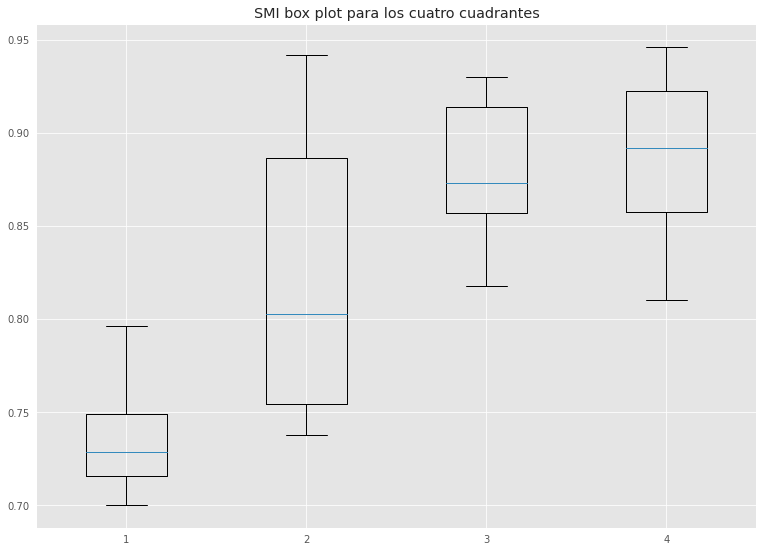

In [13]:
#Boxplot SMI para los cuatro cuadrantes
Data = ((I['SMI']), (II['SMI']), (III['SMI']), (IV['SMI']))
plt.style.use('ggplot')
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.title("SMI box plot para los cuatro cuadrantes")
 
bp = ax.boxplot(Data)

plt.show()

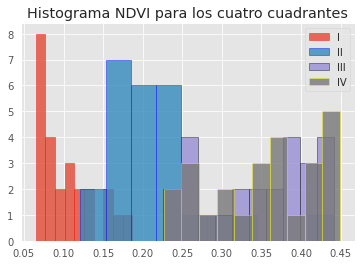

In [14]:
#Histograma múltiple de NDVI para los distintos cuadrantes
Serie1= (I['NDVI'])
Serie2= (II['NDVI'])
Serie3= (III['NDVI'])
Serie4= (IV['NDVI'])

plt.style.use('ggplot')
plt.hist(Serie1, label='I', alpha=.8, edgecolor='red')
plt.hist(Serie2, label='II', alpha=.8, edgecolor='blue')
plt.hist(Serie3, label='III', alpha=.8, edgecolor='black')
plt.hist(Serie4, label='IV', alpha=.8, edgecolor='yellow')

plt.title("Histograma NDVI para los cuatro cuadrantes")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

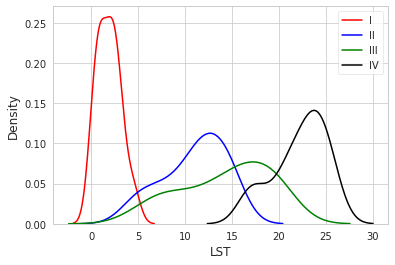

In [15]:
#Gráfico de densidades para LST en cada cuadrante
 
sns.set_style('whitegrid')
g=sns.distplot((I['LST']),hist=False, color = "red", label = 'I')
sns.distplot((II['LST']), hist=False, color = "blue", label = 'II')
sns.distplot((III['LST']), hist=False, color = "green", label = 'III')
sns.distplot((IV['LST']), hist=False, color = "black", label = 'IV')
g.legend()

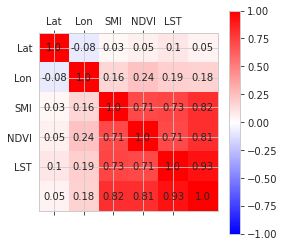

In [16]:
#Matriz de correlacion de Pearson
matriz= df1.corr()
matrizI =I.corr()
matrizII=II.corr()
matrizIII=III.corr()
matrizIV=IV.corr()



#Grafico de Correlacion
plt.matshow(matriz,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matriz.columns)):
  for j in range(len(matriz.columns)):
    plt.text(i, j, round(matriz.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()





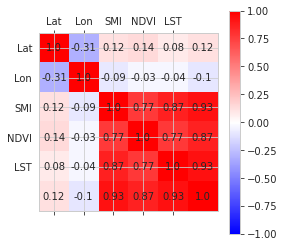

In [17]:
#Fraccionando grafico
# I
CorI= plt.matshow(matrizI,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizI.columns)):
  for j in range(len(matrizI.columns)):
    plt.text(i, j, round(matrizI.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

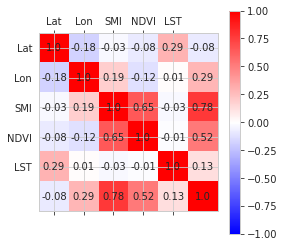

In [18]:
# II
CorII= plt.matshow(matrizII,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizII.columns)):
  for j in range(len(matrizII.columns)):
    plt.text(i, j, round(matrizII.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

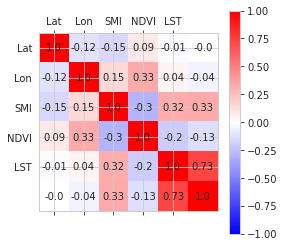

In [20]:
#III
CorIII= plt.matshow(matrizIII,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizIII.columns)):
  for j in range(len(matrizIII.columns)):
    plt.text(i, j, round(matrizIII.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

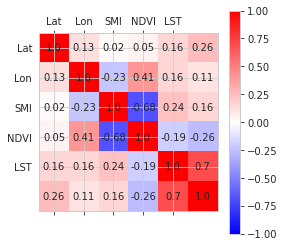

In [19]:
# IV
CorIV=plt.matshow(matrizIV,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizIV.columns)):
  for j in range(len(matrizIV.columns)):
    plt.text(i, j, round(matrizIV.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

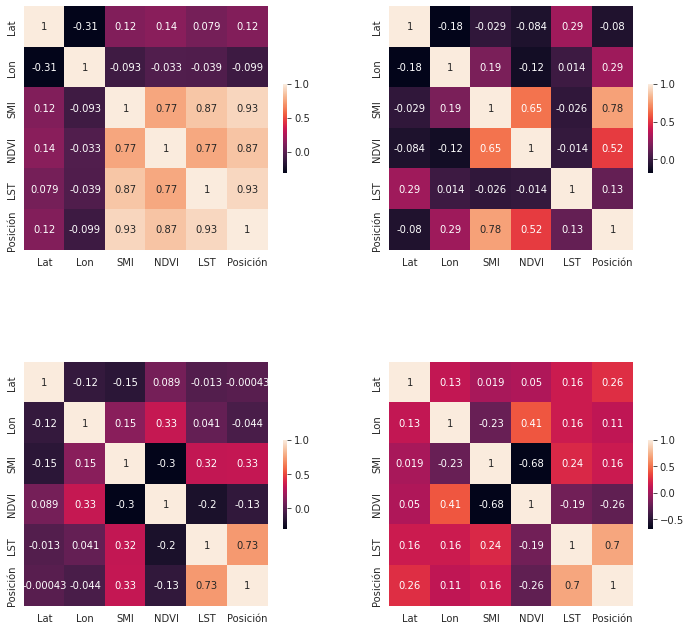

In [21]:
#Grafico de Correlacion
fig=plt.figure(figsize=[12,12])
ax1=fig.add_subplot (2,2,1)
ax2=fig.add_subplot (2,2,2)
ax3=fig.add_subplot (2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.heatmap  (matrizI, annot=True, ax=ax1, square=True, cbar_kws={"shrink":.3})
sns.heatmap (matrizII, annot=True, ax=ax2, square=True, cbar_kws={"shrink":.3})
sns.heatmap(matrizIII, annot=True, ax=ax3, square=True, cbar_kws={"shrink":.3})
sns.heatmap (matrizIV, annot=True, ax=ax4, square=True, cbar_kws={"shrink":.3})


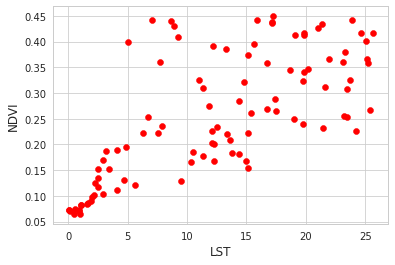

Interseccion(b) 0.12123016911618531
Pendiente (m) [0.01079132]


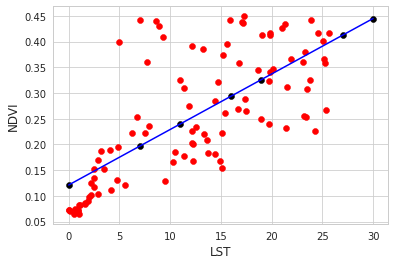

In [22]:
#Regresion lineal simple NDVI(respuesta) y LST
df1
plt.ylabel("NDVI")
plt.xlabel("LST")
plt.scatter(df1["LST"],df1["NDVI"],color="Red")
plt.show()

##
from sklearn import linear_model
regresion= linear_model.LinearRegression()
VectorLST=df1["LST"].values.reshape((-1,1))
modelo = regresion.fit(VectorLST,df1["NDVI"])
print("Interseccion(b)",modelo.intercept_)
print("Pendiente (m)",modelo.coef_)

# Predicciones con diferentes valores de LST( 0, 7,11,16,19,27,30)
ValoresLST =[[0],[7],[11],[16],[19],[27],[30]]
modelo.predict(ValoresLST)

##
plt.scatter(ValoresLST, modelo.predict(ValoresLST), color="Black")
plt.plot(ValoresLST, modelo.predict(ValoresLST),color="Blue")
plt.ylabel("NDVI")
plt.xlabel("LST")
plt.scatter(df1["LST"],df1["NDVI"],color="Red")
plt.show()

In [23]:
#Regresion lineal multiple entre NDVI vs LST y SMI

Multiple = smf.ols("NDVI ~ LST + SMI",df1)
result= Multiple.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NDVI   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     67.37
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           4.53e-19
Time:                        18:55:12   Log-Likelihood:                 113.03
No. Observations:                 100   AIC:                            -220.1
Df Residuals:                      97   BIC:                            -212.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3558      0.115     -3.085      0.003      -0.585      -0.127
LST            0.0063      0.001      4.337      0.000       0.003       0.009
SMI            0.6415      0.154      4.170      0.000       0.336       0.947
==============================================================================
Omnibus:                        5.044   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                5.079
Skew:                           0.545   Prob(JB):                       0.0789
Kurtosis:                       2.820   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
## Muestra del 80 %

df80= df1.sample(frac=.8)
I80 =I.sample(frac=.8)
II80=II.sample(frac=.8)
III80=III.sample(frac=.8)
IV80=IV.sample(frac=.8)

#Matriz
matriz8= df80.corr()
matrizI8 =I80.corr()
matrizII8=II80.corr()
matrizIII8=III80.corr()
matrizIV8=IV80.corr()


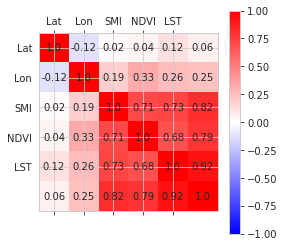

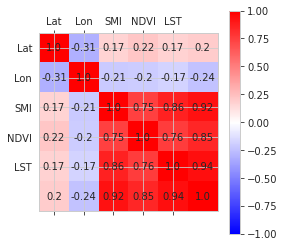

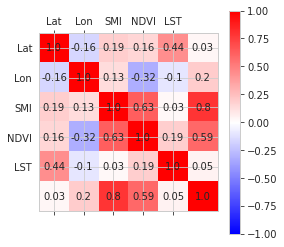

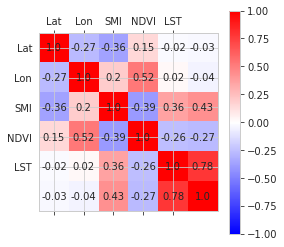

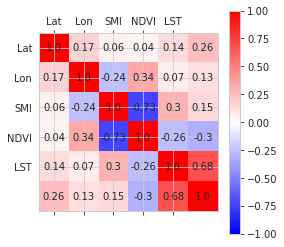

In [25]:
#Fraccionando grafico 80%

Cor8= plt.matshow(matriz8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matriz8.columns)):
  for j in range(len(matriz8.columns)):
    plt.text(i, j, round(matriz8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()
# I
Cor8I= plt.matshow(matrizI8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizI8.columns)):
  for j in range(len(matrizI8.columns)):
    plt.text(i, j, round(matrizI8.iloc[i,j],2),
             ha="center",va="center")


plt.colorbar()
plt.show()
#II    
Cor8II= plt.matshow(matrizII8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizII8.columns)):
  for j in range(len(matrizII8.columns)):
    plt.text(i, j, round(matrizII8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()
#III
Cor8III= plt.matshow(matrizIII8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizIII8.columns)):
  for j in range(len(matrizIII8.columns)):
    plt.text(i, j, round(matrizIII8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()
# IV
Cor8IV=plt.matshow(matrizIV8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizIV8.columns)):
  for j in range(len(matrizIV8.columns)):
    plt.text(i, j, round(matrizIV8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()





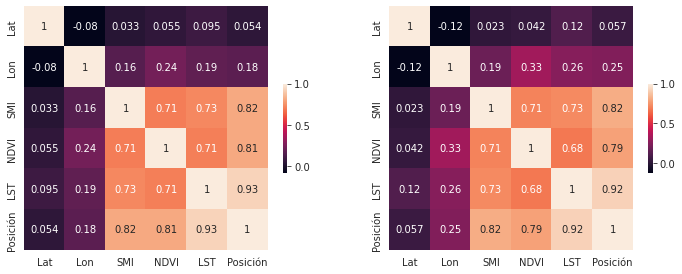

In [26]:
#Grafico de Correlacion
fig=plt.figure(figsize=[12,12])
ax1=fig.add_subplot (2,2,1)
ax2=fig.add_subplot (2,2,2)

sns.heatmap  (matriz, annot=True, ax=ax1, square=True, cbar_kws={"shrink":.3})
sns.heatmap (matriz8, annot=True, ax=ax2, square=True, cbar_kws={"shrink":.3})


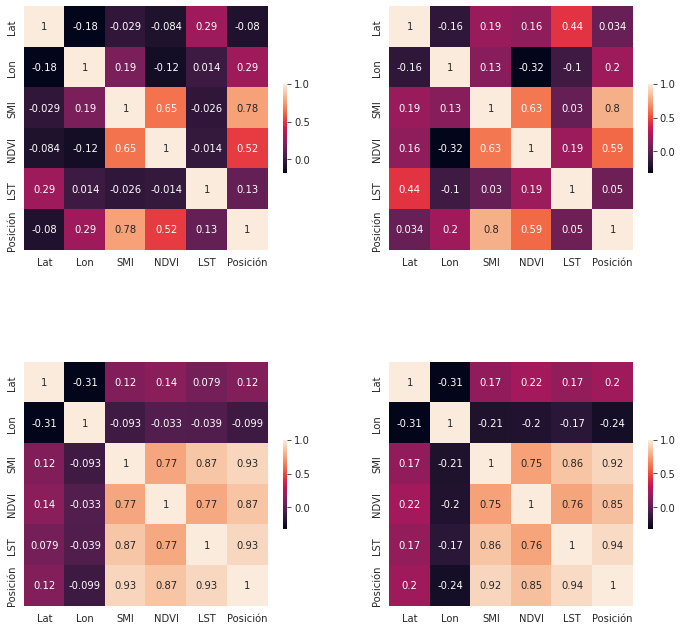

In [27]:
fig=plt.figure(figsize=[12,12])
ax3=fig.add_subplot (2,2,3)
ax4=fig.add_subplot(2,2,4)
ax5=fig.add_subplot (2,2,1)
ax6=fig.add_subplot (2,2,2)
sns.heatmap  (matrizI, annot=True, ax=ax3, square=True, cbar_kws={"shrink":.3})
sns.heatmap  (matrizI8, annot=True, ax=ax4, square=True, cbar_kws={"shrink":.3})
sns.heatmap (matrizII, annot=True, ax=ax5, square=True, cbar_kws={"shrink":.3})
sns.heatmap (matrizII8, annot=True, ax=ax6, square=True, cbar_kws={"shrink":.3})


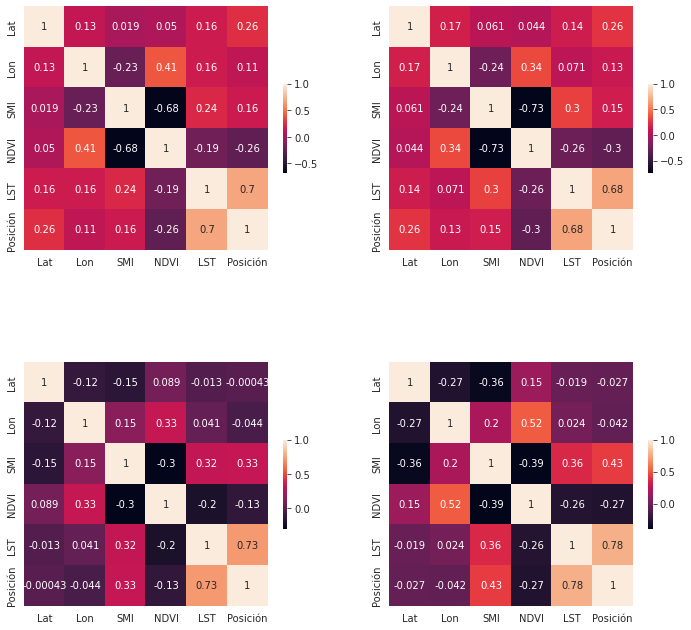

In [28]:
fig=plt.figure(figsize=[12,12])
ax7=fig.add_subplot (2,2,3)
ax8=fig.add_subplot(2,2,4)
ax9=fig.add_subplot (2,2,1)
ax10=fig.add_subplot (2,2,2)
sns.heatmap(matrizIII, annot=True, ax=ax7, square=True, cbar_kws={"shrink":.3})
sns.heatmap(matrizIII8, annot=True, ax=ax8, square=True, cbar_kws={"shrink":.3})
sns.heatmap (matrizIV, annot=True, ax=ax9, square=True, cbar_kws={"shrink":.3})
sns.heatmap (matrizIV8, annot=True, ax=ax10, square=True, cbar_kws={"shrink":.3})


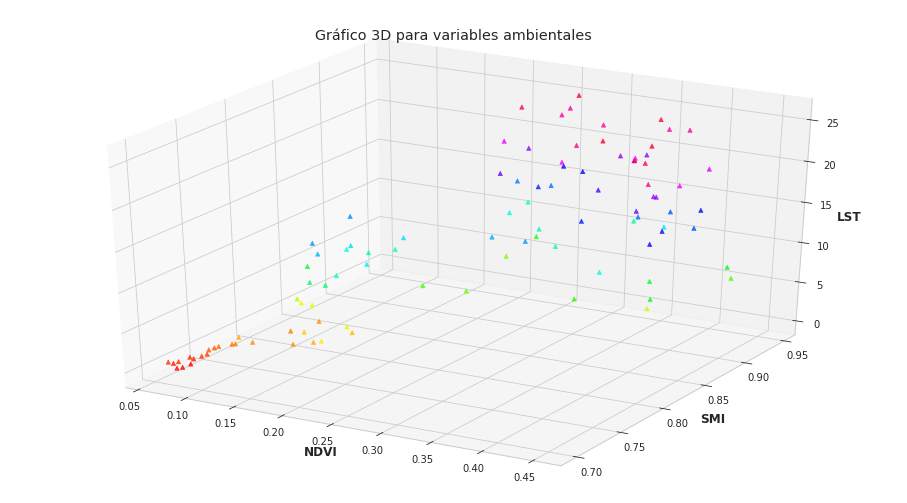

In [29]:
## Grafico 3D para variables ambientales

z = df1.LST
x = df1.NDVI
y = df1.SMI
 
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 

my_cmap = plt.get_cmap('hsv')
 
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("Gráfico 3D para variables ambientales")
ax.set_xlabel('NDVI', fontweight ='bold')
ax.set_ylabel('SMI', fontweight ='bold')
ax.set_zlabel('LST', fontweight ='bold')

 

plt.show()



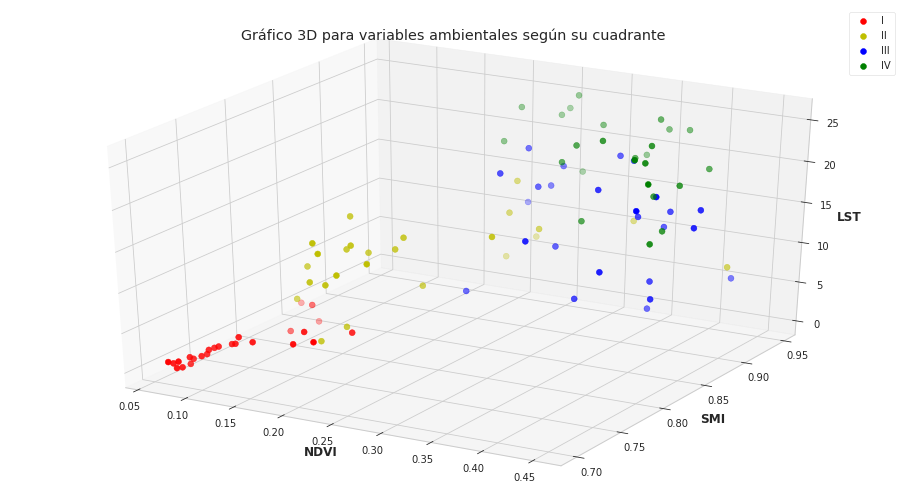

In [30]:
## Grafico 3D para variables ambientales con color por cuadrante

 
fig = plt.figure(figsize = (16, 9))

ax = fig.add_subplot(111,projection='3d')


ax.scatter(I.NDVI,I.SMI,I.LST,c='r',marker='o',s=35,label='I')
ax.scatter(II.NDVI,II.SMI,II.LST,c='y',marker='o',s=35,label='II')
ax.scatter(III.NDVI,III.SMI,III.LST,c='b',marker='o',s=35,label='III')
ax.scatter(IV.NDVI,IV.SMI,IV.LST,c='g',marker='o',s=35,label='IV')

plt.title("Gráfico 3D para variables ambientales según su cuadrante")
ax.set_xlabel('NDVI', fontweight ='bold')
ax.set_ylabel('SMI', fontweight ='bold')
ax.set_zlabel('LST', fontweight ='bold')


ax.legend(scatterpoints=1)
plt.show()




In [31]:
#Matriz de Distancias con todas las coordenadas
df_array = df1[["Lon", "Lat"]].to_numpy()
dist_mat = cdist(df_array, df_array, "euclidean")
df3=pd.DataFrame(dist_mat, columns = df1["Posición"], index = df1["Posición"])
print(df3)






Posición        0         1         2   ...        97        98        99
Posición                                ...                              
0         0.000000  0.013601  0.031321  ...  0.019647  0.022561  0.016401
1         0.013601  0.000000  0.021401  ...  0.010817  0.019698  0.009487
2         0.031321  0.021401  0.000000  ...  0.011705  0.039825  0.029732
3         0.016763  0.021633  0.043012  ...  0.031890  0.011662  0.015297
4         0.036620  0.024042  0.030000  ...  0.028231  0.025020  0.021541
...            ...       ...       ...  ...       ...       ...       ...
95        0.022561  0.019698  0.039825  ...  0.030414  0.000000  0.010296
96        0.041593  0.033541  0.047297  ...  0.042000  0.020518  0.025632
97        0.019647  0.010817  0.011705  ...  0.000000  0.030414  0.020125
98        0.022561  0.019698  0.039825  ...  0.030414  0.000000  0.010296
99        0.016401  0.009487  0.029732  ...  0.020125  0.010296  0.000000

[100 rows x 100 columns]


(5.559670000000006, -73.27687999999988)


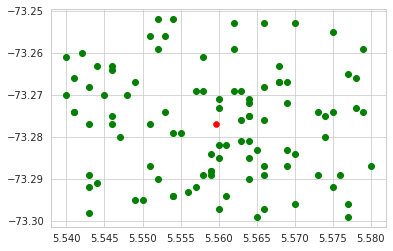

In [32]:
#Centroide de la matriz
def Centroid(dist_mat):
    length = df_array.shape[0]
    sum_x = np.sum(df_array[:, 0])
    sum_y = np.sum(df_array[:, 1])
    return sum_x/length, sum_y/length

centroide = Centroid(np.array(dist_mat))
print(centroide)

plt.plot(df1["Lon"], df1["Lat"], "go" )
plt.scatter(centroide[0], centroide[1], c="r")
plt.show()

In [33]:
#Máxima distancia de matriz
func = []
for i in range(100):
  func.append(max(dist_mat[i]))
max(func)
radius=max(func)*2/3
print(radius)


0.03573358208880045


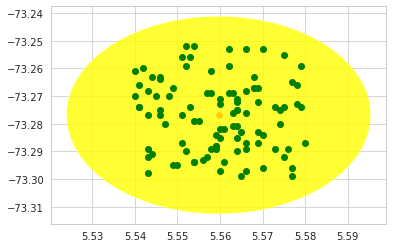

In [34]:
# Seleccionando y encerrando los puntos en un radio de 2/3 la distancia máxima

fig, ax = plt.subplots()
ax.plot(df1["Lon"], df1["Lat"], "go")
plt.scatter(centroide[0], centroide[1], c="r")
circle = plt.Circle((centroide[0], centroide[1]),radius, alpha=0.8, fc='yellow')
ax.add_patch(circle)

In [35]:
#Tomando muestras de tamaño 10 de cada cuadrante para crear un data frame de 40 filas

MI= I.sample(n=10, random_state=1)
MII= II.sample(n=10, random_state=1)
MIII= III.sample(n=10, random_state=1)
MIV= IV.sample(n=10, random_state=1)

frames = [MI, MII, MIII, MIV]

result = pd.concat(frames)
result["Posición"] = np.arange(len(result))

conditions = [
    (result['Posición'] <= 9),
    (result['Posición'] > 9) & (result['Posición'] <= 19),
    (result['Posición'] > 19) & (result['Posición'] <= 29),
    (result['Posición'] > 29)
    ]

values = ['I', 'II', 'III', 'IV']
result['Cuadrante'] = np.select(conditions, values)



print(result)


       Lat    Lon       SMI      NDVI        LST  Posición Cuadrante
14 -73.289  5.543  0.734315  0.102135   2.166323         0         I
13 -73.276  5.566  0.734492  0.098323   2.040755         1         I
17 -73.289  5.566  0.770336  0.124768   2.236591         2         I
3  -73.273  5.578  0.704783  0.071433   0.936897         3         I
21 -73.270  5.545  0.772744  0.186737   3.172808         4         I
10 -73.256  5.551  0.724556  0.083694   1.561453         5         I
18 -73.283  5.569  0.745416  0.151528   2.512310         6         I
19 -73.271  5.560  0.749270  0.169058   2.921249         7         I
4  -73.268  5.543  0.707585  0.072474   0.079172         8         I
2  -73.298  5.543  0.703694  0.070541   0.162634         9         I
39 -73.290  5.564  0.742010  0.201752  12.254068        10        II
38 -73.275  5.564  0.787109  0.128293   9.532473        11        II
42 -73.289  5.559  0.898377  0.234719  12.515485        12        II
28 -73.277  5.546  0.806738  0.209

In [44]:
from statsmodels.formula.api import ols

In [64]:
#Analisis de Varianza para SMI por cuadrante


sm.anova(data=result, dv='SMI', between=['Cuadrante'], detailed= True).round(4)

AttributeError: ignored

In [37]:
pg.anova(data=result, dv='SMI', between=['Cuadrante','Posición'], detailed= True).round(4)

NameError: ignored

In [45]:

anova = sm.stats.anova_lm("Cuadrante")

AttributeError: ignored

In [49]:
#Use alguna librería que permita extraer los residuales del modelo y haga su histograma
# crear instancia de influencia
lm = linear_model.LinearRegression()

influencia = lm.get_influence ()

#obtener residuos estandarizados 
standardized_residuals = influencia. resid_studentized_internal

#display impresión de residuos
(standardized_residuals)

plt.scatter(df1["LST"], standardized_residuals)
plt. xlabel (' x ')
plt. ylabel (' Residuos estandarizados ')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.show()

AttributeError: ignored

In [ ]:
#Utilice la prueba de Shapiro para probar normalidad en los residuales
stat,p =shapiro(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
	print('No se rechaza H0, hay normalidad en los residuales)')
else:
	print('Se rechaza H0, no hay normalidad en los residuales)')

In [ ]:
#Utilice la prueba de Levene para probar igualdad de varianzas de los residuales
stat, p = levene(df1,standardized_residuals)
p
alpha = 0.05
if p>alpha:
	print('No se rechaza H0, hay normalidad en los residuales)')
else:
	print('Se rechaza H0, no hay normalidad en los residuales)')